In this notebook are compared 4 models on the jaguars and leopards classification problem

In [1]:
from google.colab import drive
drive.mount("drive")

Mounted at drive


In [2]:
# GLOBAL VARIABLES
input_shape = (224, 224, 3)

# Setup

In [3]:
# Project base path
%cd /content/drive/MyDrive/SEAIProject

from google.colab.patches import cv2_imshow as imshow

/content/drive/MyDrive/SEAIProject


# Models

##Single Scratch

Single input model composed by a convolutional network made from scratch which extracts the features in input to two fully connected layers. At the end a sigmoidal neuron produces a score between 0 (leopard) and 1 (jaguar)

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.models import Model

base_single = models.Sequential(name = "Base_single")
base_single.add(layers.Conv2D(32, (3, 3), activation='relu',
                input_shape = input_shape, name = "conv_1_1"))
base_single.add(layers.Conv2D(32, (3, 3), activation='relu', name = "conv_1_2"))
base_single.add(layers.MaxPooling2D((2, 2), name = "max_pooling_1"))
base_single.add(layers.Conv2D(32, (3, 3), activation='relu', name = "conv_2_1"))
base_single.add(layers.Conv2D(32, (3, 3), activation='relu', name = "conv_2_2"))
base_single.add(layers.MaxPooling2D((2, 2), name = "max_pooling_2"))
base_single.add(layers.Conv2D(64, (3, 3), activation='relu', name = "conv_3_1"))
base_single.add(layers.Conv2D(64, (3, 3), activation='relu', name = "conv_3_2"))
base_single.add(layers.Conv2D(64, (3, 3), activation='relu', name = "conv_3_3"))
base_single.add(layers.MaxPooling2D((2, 2), name = "max_pooling_3"))
base_single.add(layers.Conv2D(128, (3, 3), activation='relu', name = "conv_4_1"))
base_single.add(layers.Conv2D(128, (3, 3), activation='relu', name = "conv_4_2"))
base_single.add(layers.Conv2D(128, (3, 3), activation='relu', name = "conv_4_3"))
base_single.add(layers.MaxPooling2D((2, 2), name = "max_pooling_4"))
base_single.add(layers.Conv2D(128, (3, 3), activation='relu', name = "conv_5_1"))
base_single.add(layers.Conv2D(128, (3, 3), activation='relu', name = "conv_5_2"))
base_single.add(layers.Flatten(name = "flatten"))

merged = layers.Dense(2048, activation='relu', name = "fc1")(base_single.layers[-1].output) 
merged = layers.Dropout(0.5, name = "drop1")(merged)
merged = layers.Dense(2048, activation='relu', name = "fc2")(merged)
merged = layers.Dropout(0.5, name = "drop2")(merged)
merged = layers.Dense(1, activation='sigmoid', name = "sig_out")(merged)

single_model = Model(base_single.input, merged, name = "SingleNet")

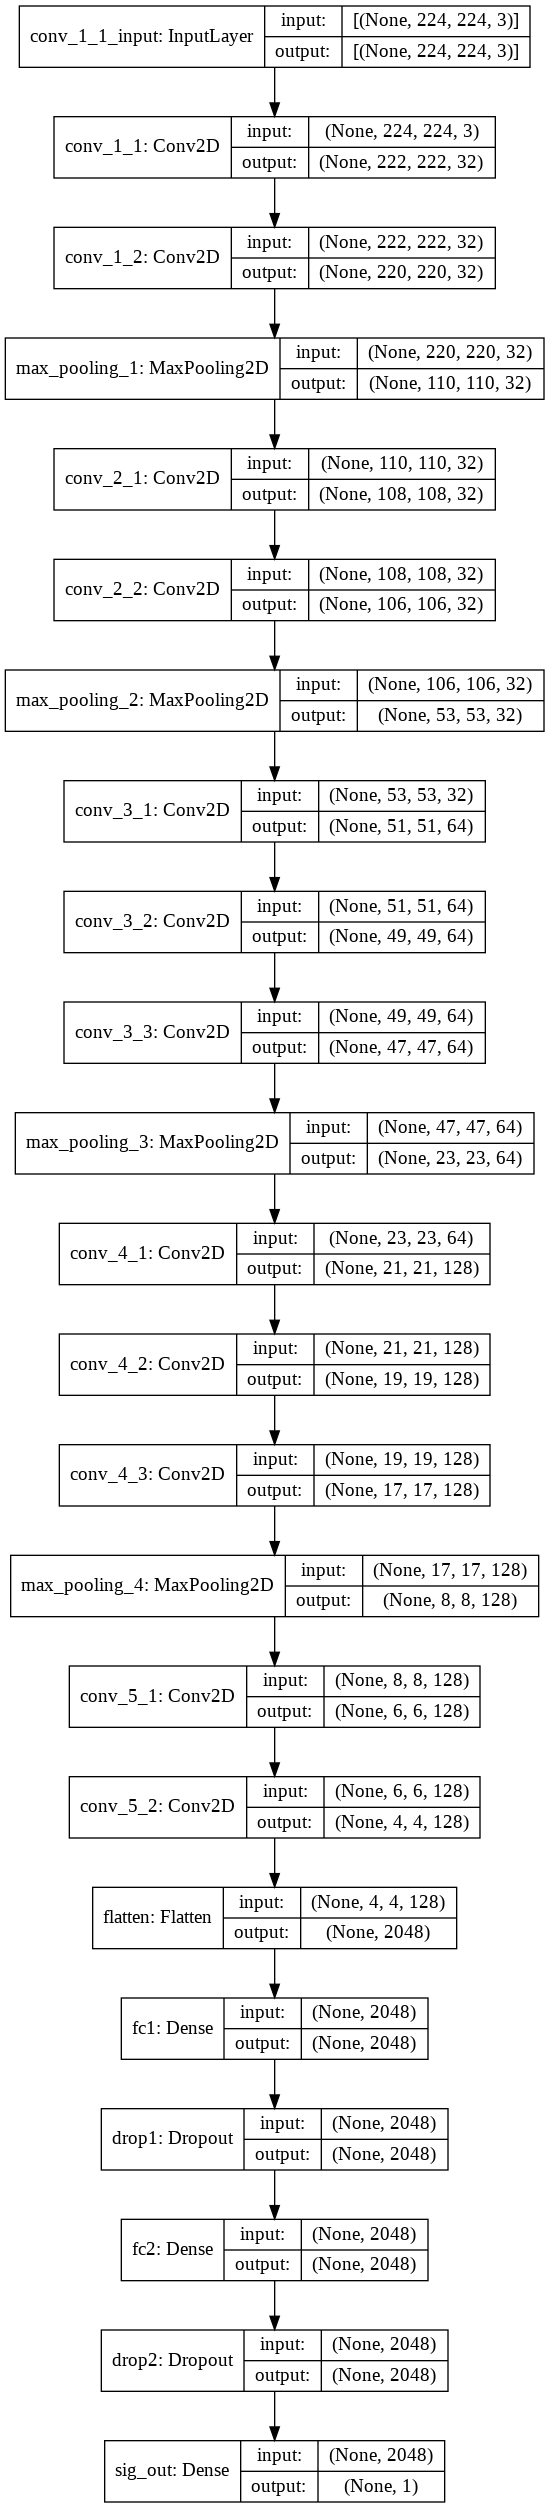

In [5]:
tf.keras.utils.plot_model(single_model, show_shapes=True, show_layer_names=True)

##Single Resnet-50

Single input model similar to the previous one but using a pretrained ResNet 50 as a convolutional network for feature extraction

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50

base_resnet = ResNet50(weights='imagenet', include_top=False, pooling='avg', input_shape=input_shape)

merged = layers.Dense(2048, activation='relu', name = "fc1")(base_resnet.output) 
merged = layers.Dropout(0.5, name = "drop1")(merged)
merged = layers.Dense(2048, activation='relu', name = "fc2")(merged)
merged = layers.Dropout(0.5, name = "drop2")(merged)
merged = layers.Dense(1, activation='sigmoid', name = "sig_out")(merged)

single_resnet_model = Model(base_resnet.input, merged, name = "SingleNet")

94773248/94765736 [==============================] - 1s 0us/step


In [7]:
tf.keras.utils.plot_model(single_resnet_model, show_shapes=True, show_layer_names=True)

Output hidden; open in https://colab.research.google.com to view.

##Siamese Scratch

This model is characterized by a Siamese network that takes in input two images, one with a jaguar and one with a leopard. The network must identify where the jaguar is, whether it is in the left input (0) or in the right input (1)

The same CNN as the single network is used as the base model, the difference lies in the completely connected layers that take as input the features extracted from both inputs. A sigmoidal neuron is used to determine the score between 0 (jaguar on the left) and 1 (jaguar on the right)


In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.models import Model

base_siamese = models.Sequential(name = "Base_siamese")
base_siamese.add(layers.Conv2D(32, (3, 3), activation='relu',
                  input_shape = input_shape, name = "conv_1_1"))
base_siamese.add(layers.Conv2D(32, (3, 3), activation='relu', name = "conv_1_2"))
base_siamese.add(layers.MaxPooling2D((2, 2), name = "max_pooling_1"))
base_siamese.add(layers.Conv2D(32, (3, 3), activation='relu', name = "conv_2_1"))
base_siamese.add(layers.Conv2D(32, (3, 3), activation='relu', name = "conv_2_2"))
base_siamese.add(layers.MaxPooling2D((2, 2), name = "max_pooling_2"))
base_siamese.add(layers.Conv2D(64, (3, 3), activation='relu', name = "conv_3_1"))
base_siamese.add(layers.Conv2D(64, (3, 3), activation='relu', name = "conv_3_2"))
base_siamese.add(layers.Conv2D(64, (3, 3), activation='relu', name = "conv_3_3"))
base_siamese.add(layers.MaxPooling2D((2, 2), name = "max_pooling_3"))
base_siamese.add(layers.Conv2D(128, (3, 3), activation='relu', name = "conv_4_1"))
base_siamese.add(layers.Conv2D(128, (3, 3), activation='relu', name = "conv_4_2"))
base_siamese.add(layers.Conv2D(128, (3, 3), activation='relu', name = "conv_4_3"))
base_siamese.add(layers.MaxPooling2D((2, 2), name = "max_pooling_4"))
base_siamese.add(layers.Conv2D(128, (3, 3), activation='relu', name = "conv_5_1"))
base_siamese.add(layers.Conv2D(128, (3, 3), activation='relu', name = "conv_5_2"))
base_siamese.add(layers.Flatten(name = "flatten"))

left_input = keras.Input(input_shape, name = "left_input")
right_input = keras.Input(input_shape, name = "right_input")

encoded_l = base_siamese(left_input)
encoded_r = base_siamese(right_input)

merged = layers.concatenate([encoded_l, encoded_r], name="concat_layer")
merged = layers.Dense(4096, activation='relu', name = "fc1")(merged) 
merged = layers.Dropout(0.5, name = "drop1")(merged)
merged = layers.Dense(4096, activation='relu', name = "fc2")(merged)
merged = layers.Dropout(0.5, name = "drop2")(merged)
merged = layers.Dense(1, activation='sigmoid', name = "sig_out")(merged)

siamese_model = Model([left_input, right_input], merged, name = "SiameseTAFCNet")

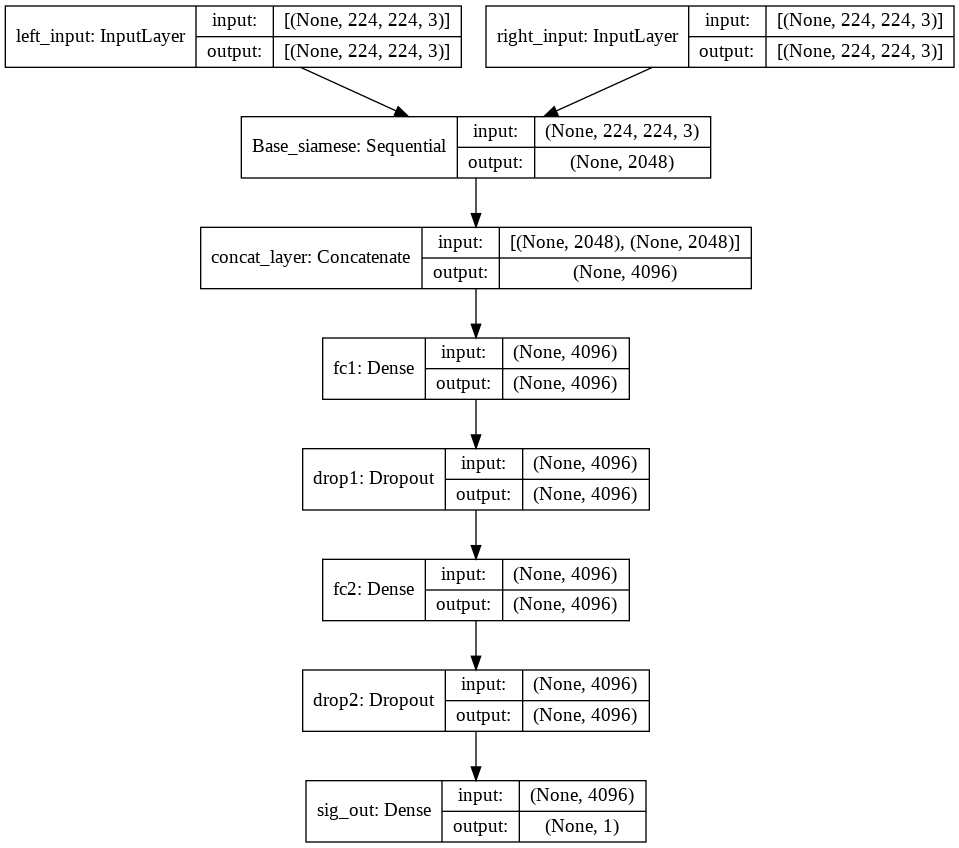

In [9]:
tf.keras.utils.plot_model(siamese_model, show_shapes=True, show_layer_names=True)

## Siamese Resnet-50

Siamese model similar to the previous one but using a pretrained ResNet 50 as a convolutional network for feature extraction

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50

base_resnet_siamese = ResNet50(weights='imagenet', include_top=False, pooling='avg', input_shape=input_shape)

left_input = keras.Input(input_shape, name = "left_input")
right_input = keras.Input(input_shape, name = "right_input")

encoded_l = base_resnet_siamese(left_input)
encoded_r = base_resnet_siamese(right_input)

merged = layers.concatenate([encoded_l, encoded_r], name="concat_layer")
merged = layers.Dense(4096, activation='relu', name = "fc1")(merged) 
merged = layers.Dropout(0.5, name = "drop1")(merged)
merged = layers.Dense(4096, activation='relu', name = "fc2")(merged)
merged = layers.Dropout(0.5, name = "drop2")(merged)
merged = layers.Dense(1, activation='sigmoid', name = "sig_out")(merged)

siamese_resnet_model = Model([left_input, right_input], merged, name = "SiameseTAFCNet")

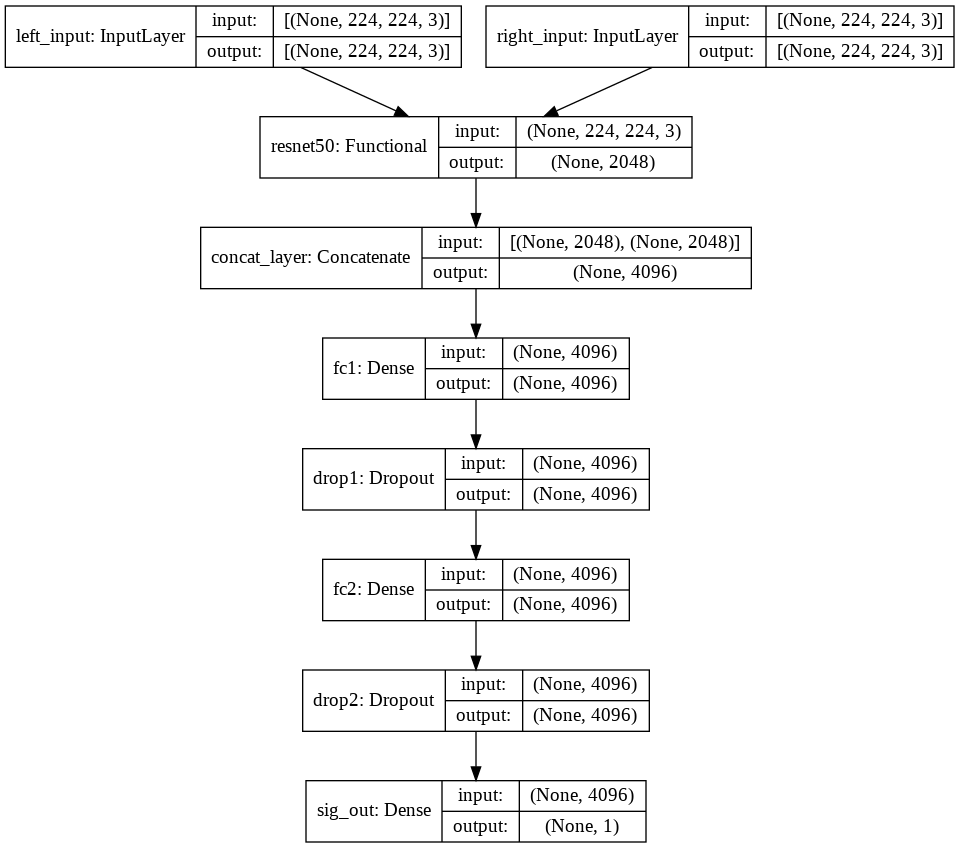

In [11]:
tf.keras.utils.plot_model(siamese_resnet_model, show_shapes=True, show_layer_names=True)

# Comparison

The single input models are trained on the classification of single images, the Siamese models instead are directly trained to respond to the two alternative forced choice problem

##Setup

First of all, lists are created with the paths of all images

In [12]:
import os

BASE_PATH = "Data/JagsVsLeops/"

# Get file-names in folders
jags_files = [BASE_PATH + "jaguar/" + name for name in os.listdir(BASE_PATH + "jaguar/") if os.path.isfile(os.path.join(BASE_PATH + "jaguar/", name))]
leops_files = [BASE_PATH + "leopard/" + name for name in os.listdir(BASE_PATH + "leopard/") if os.path.isfile(os.path.join(BASE_PATH + "leopard/", name))]

Example of a jaguar

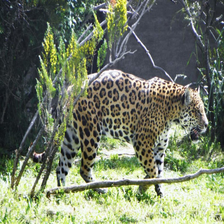

In [18]:
# Pick a random jaguar
from PIL import Image
import math
import random
img = Image.open(jags_files[math.floor(random.uniform(0,len(jags_files)))])
img = img.resize((input_shape[0],input_shape[1]), Image.ANTIALIAS)
img

Example of a leopard

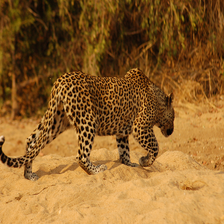

In [12]:
# Pick a random leopard
from PIL import Image
import math
import random
img = Image.open(leops_files[math.floor(random.uniform(0,len(leops_files)))])
img = img.resize((input_shape[0],input_shape[1]), Image.ANTIALIAS)
img

The dataset is fairly balanced with a slight majority of leopards

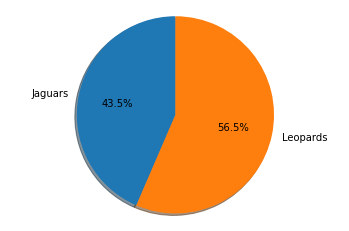

['Jaguars', 'Leopards']
[617, 801]


In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ["Jaguars", "Leopards"]
sizes = [len(jags_files),len(leops_files)]
explode = (0, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()
print(labels)
print(sizes)

The split requires that 60% of the images go into the training set, that 20% go into the validation set and that the remaining 20% is use as a test set

In [14]:
import random

# Split JAGS

# Split 40% of elements as test and validation sets and 60% as trainingset 
k = len(jags_files) * 40 // 100
indicies = random.sample(range(len(jags_files)), k)
jags_files_val_test = [jags_files[i] for i in indicies]
jags_files_train = [i for i in jags_files if i not in jags_files_val_test]

# Split 20% of elements as testset and 20% as validationset 
k = len(jags_files_val_test) * 50 // 100
indicies = random.sample(range(len(jags_files_val_test)), k)
jags_files_val = [jags_files_val_test[i] for i in indicies]
jags_files_test = [i for i in jags_files_val_test if i not in jags_files_val]

print("Training set len: ", len(jags_files_train))
print("Validation set len: ", len(jags_files_val))
print("test set len: ", len(jags_files_test))

Training set len:  371
Validation set len:  123
test set len:  123


In [15]:
# Split LEOPS

# Split 40% of elements as test and validation sets and 60% as trainingset 
k = len(leops_files) * 40 // 100
indicies = random.sample(range(len(leops_files)), k)
leops_files_val_test = [leops_files[i] for i in indicies]
leops_files_train = [i for i in leops_files if i not in leops_files_val_test]

# Split 20% of elements as testset and 20% as validationset 
k = len(leops_files_val_test) * 50 // 100
indicies = random.sample(range(len(leops_files_val_test)), k)
leops_files_val = [leops_files_val_test[i] for i in indicies]
leops_files_test = [i for i in leops_files_val_test if i not in leops_files_val]

print("Training set len: ", len(leops_files_train))
print("Validation set len: ", len(leops_files_val))
print("test set len: ", len(leops_files_test))

Training set len:  481
Validation set len:  160
test set len:  160


A strong augmentation is used to prevent overfitting

In [ ]:
# Data augmentation
data_augmentation = tf.keras.Sequential([
     layers.experimental.preprocessing.RandomFlip("horizontal"),
     layers.experimental.preprocessing.RandomRotation(0.20),
     layers.experimental.preprocessing.RandomZoom(height_factor=(-0.3,0.3), width_factor=(-0.3,0.3),fill_mode='nearest'),
     layers.experimental.preprocessing.RandomContrast(factor=0.8)
     ])

#augmented_image = data_augmentation(tf.expand_dims(img, 0))

This function allows you to iteratively obtain the images from the dataset and perform augmentation on them. If used to generate training set batches, in the case of single images an image of a jaguar or an image of a leopard is randomly taken until the batch is completed, in the case of the alternative choices, a jaguar and a leopard are randomly chosen and randomly positioned to the right or left. In the case of validation, fixed validation sets are created and used for all epochs both in the single case and in the case of alternative choices.

In [16]:
from tqdm.notebook import tqdm
import numpy as np   
from PIL import Image
import numpy
import math
import random 

class Samples_Generator(keras.utils.Sequence):
  '''
  Custom data generator to be used by keras model utilities to retreive and 
  preprocess batches of data
   _
  |_| batch --> []-[]-[]-[]... < [] --> [left_img][right_img]
  |_| label --> l1-l2-l3-l4... --> if jaguar on left --> lab = 0 otherwise 1

  '''
  
  def __init__(
      self, 
      batch_size = 32, 
      batches_per_epoch = 1,
      single = False,
      augmentation = False,
      jags_files = None,
      leops_files = None,
      validation = False
  ):
      self.batch_size = batch_size
      self.batches_per_epoch = batches_per_epoch
      self.single = single
      self.jags_files = jags_files
      self.leops_files = leops_files
      self.augmentation = augmentation
      self.validation = validation

      if self.validation and not single:
        # Creates a static validation set
        # Uses three permutations of the validationset
        k = min(len(leops_files), len(jags_files))
        indicies = random.sample(range(len(leops_files)), k)
        self.leops_files = [leops_files[i] for i in indicies]
        indicies = random.sample(range(len(jags_files)), k)
        self.jags_files = [jags_files[i] for i in indicies]

        indicies = random.sample(range(len(leops_files)), k)
        self.leops_files = self.leops_files + [leops_files[i] for i in indicies]
        indicies = random.sample(range(len(jags_files)), k)
        self.jags_files = self.jags_files + [jags_files[i] for i in indicies]

        indicies = random.sample(range(len(leops_files)), k)
        self.leops_files = self.leops_files + [leops_files[i] for i in indicies]
        indicies = random.sample(range(len(jags_files)), k)
        self.jags_files = self.jags_files + [jags_files[i] for i in indicies]

        print(len(jags_files))

        # Use enaugh batches 
        self.batches_per_epoch = k*2//self.batch_size

      if self.validation and single:
        self.val_set = leops_files + jags_files
        self.batches_per_epoch = len(self.val_set)//self.batch_size

  def __len__(self):
      # Denotes the number of batches per epoch
      return self.batches_per_epoch

  def __getitem__(self, index):
      X, y = self.__get_data(index)
      return X, y

  def generate_batch(self, index=0):
    return self.__getitem__(index)

  def __get_data(self, index):

    batch_left = []
    batch_right = []
    labels = []
    batch = []
    
    for sample_idx in range(self.batch_size*index,self.batch_size*index + self.batch_size):

      if self.single:

        # Single input

        if self.validation:
          # always same validation set
          img = Image.open(self.val_set[sample_idx])
          img = numpy.array(img.resize((input_shape[0],input_shape[1]), Image.ANTIALIAS))
          if self.augmentation:
            img = np.array(data_augmentation(tf.expand_dims(img, 0))[0])
          batch.append(img) 

          if 'jaguar' in  self.val_set[sample_idx]:
            labels.append(1)
          else:
            labels.append(0)

        else:

          if np.random.rand() > 0.5:
            # if jaguar present --> lab = 1
            img = Image.open(self.jags_files[math.floor(random.uniform(0,len(self.jags_files)))])
            img = numpy.array(img.resize((input_shape[0],input_shape[1]), Image.ANTIALIAS))
            if self.augmentation:
              img = np.array(data_augmentation(tf.expand_dims(img, 0))[0])
            batch.append(img)   
            labels.append(1)
          else:
            # if leopard present --> lab = 0
            img = Image.open(self.leops_files[math.floor(random.uniform(0,len(self.leops_files)))])
            img = numpy.array(img.resize((input_shape[0],input_shape[1]), Image.ANTIALIAS))
            if self.augmentation:
              img =  np.array(data_augmentation(tf.expand_dims(img, 0))[0])
            batch.append(img)  
            labels.append(0)

      else:

        # Double input for siamese 
        if self.validation:
          img = Image.open(self.jags_files[sample_idx])
        else:
          img = Image.open(self.jags_files[math.floor(random.uniform(0,len(self.jags_files)))])

        img_jag = numpy.array(img.resize((input_shape[0],input_shape[1]), Image.ANTIALIAS))

        if self.validation:
          img = Image.open(self.leops_files[sample_idx])
        else:
          img = Image.open(self.leops_files[math.floor(random.uniform(0,len(self.leops_files)))])

        img_leop = numpy.array(img.resize((input_shape[0],input_shape[1]), Image.ANTIALIAS))

        if self.augmentation:
          img_jag =  np.array(data_augmentation(tf.expand_dims(img_jag, 0))[0])
          img_leop =  np.array(data_augmentation(tf.expand_dims(img_leop, 0))[0])

        if self.validation:
          # to alwais have the same validation split
          side = sample_idx%2
        else:
          side = np.random.rand()

        if side > 0.5:
          # if jaguar on left --> lab = 0
          batch_left.append(img_jag)   
          batch_right.append(img_leop)
          labels.append(0)
        else:
          # if jaguar on right --> lab = 1
          batch_left.append(img_leop)   
          batch_right.append(img_jag)  
          labels.append(1)
        
        batch = [np.array(batch_left),np.array(batch_right)]

    if self.single:
      batch = np.array(batch)

    return batch, np.array(labels)

Used to print progressive plots to visualize accuracy during traning

In [ ]:
!pip install jupyterplot
from jupyterplot import ProgressPlot
import numpy as np

from jupyterplot import ProgressPlot
import numpy as np

class PlotCallback(keras.callbacks.Callback):
  def on_train_begin(self, logs={}):
    self.pp = ProgressPlot(line_names=["Training", "Validation"], x_iterator=False, plot_names=["Accuracy","Loss"], x_label="Epoch", y_lim=[0,1])

  def on_train_end(self, logs=None):
    self.pp.finalize()

  def on_epoch_end(self, epoch, logs=None):
    self.pp.update(epoch, [[logs["accuracy"], logs["val_accuracy"]],[logs["loss"], logs["val_loss"]]])

     |████████████████████████████████| 71kB 5.6MB/s 
  Created wheel for lrcurve: filename=lrcurve-1.1.0-cp37-none-any.whl size=69143 sha256=7a8615b25738adda591052651c47c51d9badbce8a439872f65062eb3c8a1136e
  Stored in directory: /root/.cache/pip/wheels/75/a4/04/20e13c039859fa02094902e615d74fa46bfd6908906e31e278
Successfully built lrcurve


## Batch Example

Correctly prints the batches to visualize their composition

In [ ]:
from google.colab.patches import cv2
def print_batch(batch, labels, single):
  if single:
    for img, label in zip(batch, labels):
      print("Label: " + str(label))
      imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # images are in BGR
  else:
    for sx, dx, label in zip(batch[0], batch[1], labels):
      print("Label: " + str(label))
      imshow(cv2.cvtColor(sx, cv2.COLOR_BGR2RGB))
      imshow(cv2.cvtColor(dx, cv2.COLOR_BGR2RGB))

Label: 1


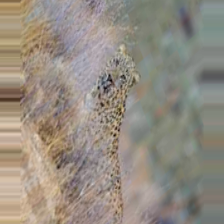

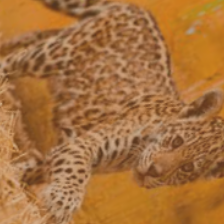

Label: 0


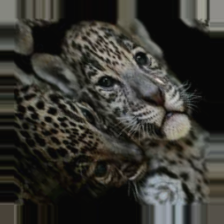

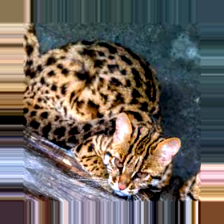

Label: 0


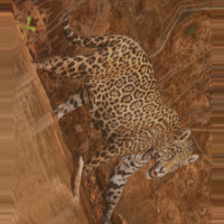

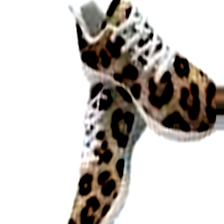

Label: 0


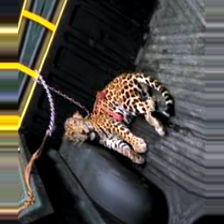

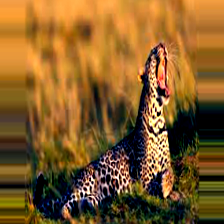

Label: 1


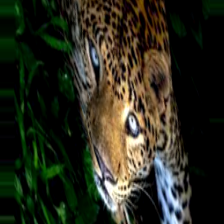

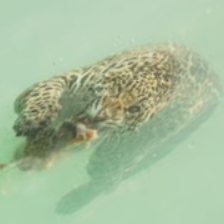

Label: 1


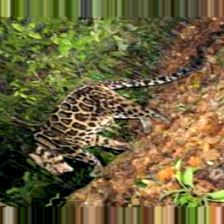

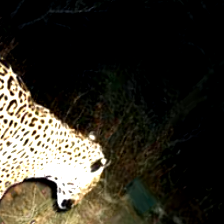

Label: 1


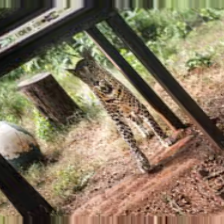

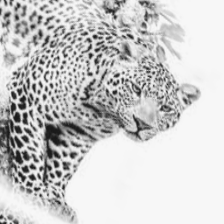

Label: 0


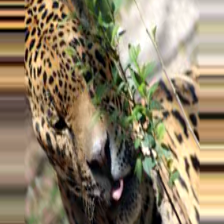

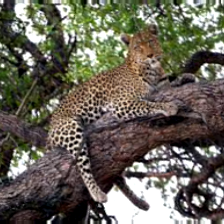

Label: 0


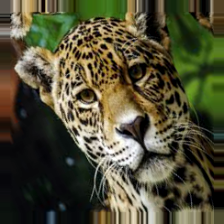

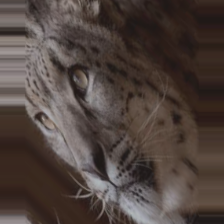

Label: 1


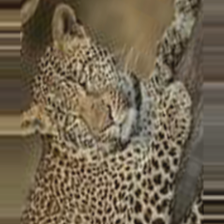

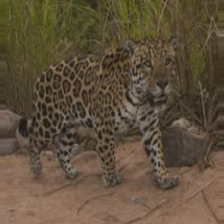

In [ ]:
test = Samples_Generator(batch_size=10,single=False, jags_files=jags_files, leops_files=leops_files, augmentation=True)
batch = test.generate_batch()
print_batch(batch[0], batch[1], single=False)

Label: 0


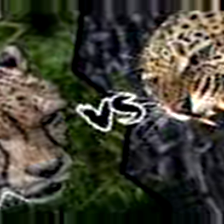

Label: 0


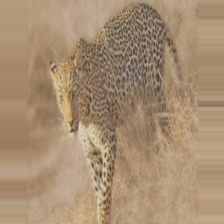

Label: 0


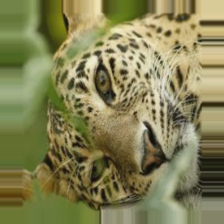

Label: 1


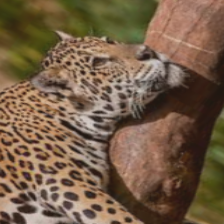

Label: 0


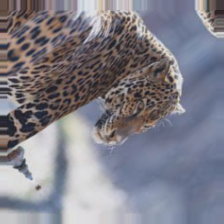

Label: 1


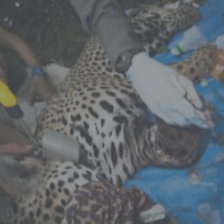

Label: 1


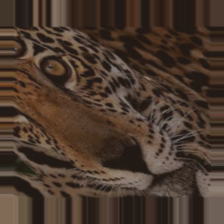

Label: 1


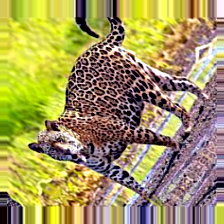

Label: 1


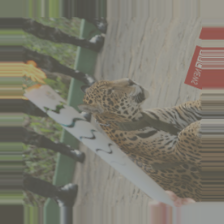

Label: 1


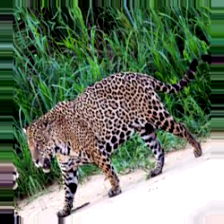

In [ ]:
test = Samples_Generator(batch_size=10,single=True, jags_files=jags_files, leops_files=leops_files, augmentation=True)
batch = test.generate_batch()
print_batch(batch[0], batch[1], single=True)

##Training

All models are trained using an early stopping with 5 epochs patience to allow comparison.

### SINGLE SCRATCH

In [ ]:
# Single
training_generator = Samples_Generator(batch_size=32, batches_per_epoch=128, single=True, jags_files=jags_files_train, leops_files=leops_files_train, augmentation=True)
validation_generator = Samples_Generator(batch_size=32, single=True, jags_files=jags_files_val, leops_files=leops_files_val, validation=True)

# Automatically restore best weights after early stopping
es_callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

single_model.compile(loss='binary_crossentropy', optimizer= keras.optimizers.Adam(1e-5), metrics=['accuracy'])
MAX_EPOCHS = 100
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [ ]:
history = single_model.fit(   training_generator, 
                              validation_data=validation_generator,
                              epochs=MAX_EPOCHS, 
                              workers=16, 
                              use_multiprocessing=False, 
                              callbacks=[PlotCallback(), es_callback])

Epoch 1/100
128/128 [==============================] - 152s 846ms/step - loss: 0.7506 - accuracy: 0.5127 - val_loss: 0.6640 - val_accuracy: 0.6055
Epoch 2/100
128/128 [==============================] - 92s 669ms/step - loss: 0.6904 - accuracy: 0.5347 - val_loss: 0.6600 - val_accuracy: 0.6367
Epoch 3/100
128/128 [==============================] - 94s 690ms/step - loss: 0.6883 - accuracy: 0.5483 - val_loss: 0.6982 - val_accuracy: 0.5156
Epoch 4/100
128/128 [==============================] - 98s 696ms/step - loss: 0.6829 - accuracy: 0.5513 - val_loss: 0.6554 - val_accuracy: 0.6406
Epoch 5/100
128/128 [==============================] - 96s 704ms/step - loss: 0.6818 - accuracy: 0.5637 - val_loss: 0.6323 - val_accuracy: 0.6367
Epoch 6/100
128/128 [==============================] - 97s 704ms/step - loss: 0.6809 - accuracy: 0.5652 - val_loss: 0.6366 - val_accuracy: 0.6406
Epoch 7/100
128/128 [==============================] - 97s 692ms/step - loss: 0.6755 - accuracy: 0.5713 - val_loss: 0.6922 

### SINGLE RESNET

In [ ]:
# Single
training_generator = Samples_Generator(batch_size=32, batches_per_epoch=128, single=True, jags_files=jags_files_train, leops_files=leops_files_train, augmentation=True)
validation_generator = Samples_Generator(batch_size=32, single=True, jags_files=jags_files_val, leops_files=leops_files_val, validation=True)

# Automatically restore best weights after early stopping
es_callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

single_resnet_model.compile(loss='binary_crossentropy', optimizer= keras.optimizers.Adam(1e-5), metrics=['accuracy'])
MAX_EPOCHS = 100
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [ ]:
history = single_resnet_model.fit(   training_generator, 
                              validation_data=validation_generator,
                              epochs=MAX_EPOCHS, 
                              workers=16, 
                              use_multiprocessing=False, 
                              callbacks=[PlotCallback(), es_callback])

Epoch 1/100
128/128 [==============================] - 134s 935ms/step - loss: 0.7152 - accuracy: 0.5645 - val_loss: 0.5788 - val_accuracy: 0.7031
Epoch 2/100
128/128 [==============================] - 121s 888ms/step - loss: 0.6280 - accuracy: 0.6531 - val_loss: 0.5876 - val_accuracy: 0.7148
Epoch 3/100
128/128 [==============================] - 120s 883ms/step - loss: 0.5391 - accuracy: 0.7214 - val_loss: 0.5899 - val_accuracy: 0.7266
Epoch 4/100
128/128 [==============================] - 123s 886ms/step - loss: 0.4695 - accuracy: 0.7832 - val_loss: 0.6262 - val_accuracy: 0.7500
Epoch 5/100
128/128 [==============================] - 120s 887ms/step - loss: 0.4217 - accuracy: 0.8076 - val_loss: 0.6565 - val_accuracy: 0.7578
Epoch 6/100
128/128 [==============================] - 125s 899ms/step - loss: 0.3987 - accuracy: 0.8210 - val_loss: 0.6543 - val_accuracy: 0.7656


### SIAMESE SCRATCH

In [ ]:
# Siamese
training_generator = Samples_Generator(batch_size=32, batches_per_epoch=128, jags_files=jags_files_train, leops_files=leops_files_train, augmentation=True)
validation_generator = Samples_Generator(batch_size=32, jags_files=jags_files_val, leops_files=leops_files_val)

# Automatically restore best weights after early stopping
es_callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

siamese_model.compile(loss='binary_crossentropy', optimizer= keras.optimizers.Adam(1e-5), metrics=['accuracy'])
MAX_EPOCHS = 100
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [ ]:
history = siamese_model.fit(  training_generator, 
                              validation_data=validation_generator,
                              epochs=MAX_EPOCHS, 
                              workers=16, 
                              use_multiprocessing=False, 
                              callbacks=[PlotCallback(), es_callback])

Epoch 1/100
128/128 [==============================] - 196s 1s/step - loss: 0.7085 - accuracy: 0.5281 - val_loss: 0.6330 - val_accuracy: 0.7188
Epoch 2/100
128/128 [==============================] - 195s 1s/step - loss: 0.6578 - accuracy: 0.6055 - val_loss: 0.5549 - val_accuracy: 0.7188
Epoch 3/100
128/128 [==============================] - 191s 1s/step - loss: 0.6477 - accuracy: 0.6245 - val_loss: 0.5817 - val_accuracy: 0.6562
Epoch 4/100
128/128 [==============================] - 186s 1s/step - loss: 0.6355 - accuracy: 0.6360 - val_loss: 0.6169 - val_accuracy: 0.5625
Epoch 5/100
128/128 [==============================] - 194s 1s/step - loss: 0.6200 - accuracy: 0.6536 - val_loss: 0.6531 - val_accuracy: 0.5938
Epoch 6/100
128/128 [==============================] - 188s 1s/step - loss: 0.6122 - accuracy: 0.6599 - val_loss: 0.5038 - val_accuracy: 0.7812
Epoch 7/100
128/128 [==============================] - 187s 1s/step - loss: 0.6088 - accuracy: 0.6621 - val_loss: 0.5473 - val_accuracy:

### SIAMESE RESNET

In [ ]:
# Siamese
training_generator = Samples_Generator(batch_size=32, batches_per_epoch=128, jags_files=jags_files_train, leops_files=leops_files_train, augmentation=True)
validation_generator = Samples_Generator(batch_size=32, jags_files=jags_files_val, leops_files=leops_files_val)

# Automatically restore best weights after early stopping
es_callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

siamese_resnet_model.compile(loss='binary_crossentropy', optimizer= keras.optimizers.Adam(1e-5), metrics=['accuracy'])
MAX_EPOCHS = 100
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [ ]:
history = siamese_resnet_model.fit(  training_generator, 
                              validation_data=validation_generator,
                              epochs=MAX_EPOCHS, 
                              workers=16, 
                              use_multiprocessing=False, 
                              callbacks=[PlotCallback(), es_callback])

Epoch 1/100
128/128 [==============================] - 321s 2s/step - loss: 0.6552 - accuracy: 0.6196 - val_loss: 0.5023 - val_accuracy: 0.6562
Epoch 2/100
128/128 [==============================] - 244s 2s/step - loss: 0.4744 - accuracy: 0.7708 - val_loss: 0.5464 - val_accuracy: 0.6562
Epoch 3/100
128/128 [==============================] - 241s 2s/step - loss: 0.3470 - accuracy: 0.8459 - val_loss: 0.3150 - val_accuracy: 0.9375
Epoch 4/100
128/128 [==============================] - 240s 2s/step - loss: 0.2646 - accuracy: 0.8909 - val_loss: 0.5123 - val_accuracy: 0.8750
Epoch 5/100
128/128 [==============================] - 237s 2s/step - loss: 0.2214 - accuracy: 0.9146 - val_loss: 0.4703 - val_accuracy: 0.8125
Epoch 6/100
128/128 [==============================] - 242s 2s/step - loss: 0.1873 - accuracy: 0.9248 - val_loss: 0.1387 - val_accuracy: 0.9688
Epoch 7/100
128/128 [==============================] - 237s 2s/step - loss: 0.1534 - accuracy: 0.9377 - val_loss: 0.6147 - val_accuracy:

## Save Models

In [ ]:
siamese_model.save("Models/Siamese_jagsleops")

In [ ]:
siamese_resnet_model.save("Models/siamese_resnet_jagsleops")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
single_model.save("Models/Single_jagsleops")

In [ ]:
single_resnet_model.save("Models/Single_resnet_jagsleops")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


## Load Models

In [20]:
siamese_model = keras.models.load_model('Models/Siamese_jagsleops')
single_model = keras.models.load_model('Models/Single_jagsleops')

siamese_resnet_model = keras.models.load_model("Models/siamese_resnet_jagsleops")
single_resnet_model = keras.models.load_model("Models/Single_resnet_jagsleops")

# Test

Comparison between the various models

## Utils

Utility function to plot the confusion matrix

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

## Single Test

Comparison between the scratch model and the one with resnet on the problem of classification of single images

Creation of the testset with all the images of the split

In [21]:
from tqdm.notebook import tqdm
import gc
import numpy as np

testset = []
labels = []
first = True

for i in range(len(jags_files_test)):

  img = Image.open(jags_files_test[i])
  img = np.array(img.resize((input_shape[0],input_shape[1]), Image.ANTIALIAS))

  testset.append(img)
  labels.append(1)

for i in range(len(leops_files_test)):

  img = Image.open(leops_files_test[i])
  img = np.array(img.resize((input_shape[0],input_shape[1]), Image.ANTIALIAS))

  testset.append(img)
  labels.append(0)

testset = np.array(testset)

Predictions of the two models

In [22]:
single_preds = single_model.predict(testset, batch_size = 100)
single_resnet_preds = single_resnet_model.predict(testset, batch_size = 100)

It can be seen how overfitting prevents the network trained from scratch from achieving optimal performance in the classification, make it preferring the majority class. The pretrained network, on the other hand, appears to have decidedly better performances even if overall not optimal due to the complexity of the problem and the reduced dataset

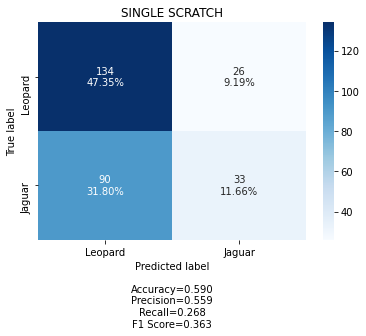

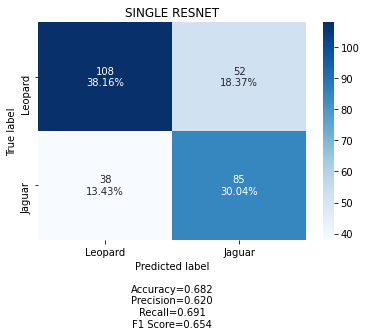

In [23]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(labels, [i>0.5 for i in single_preds])
make_confusion_matrix(cf_matrix, categories=["Leopard", "Jaguar"], title="SINGLE SCRATCH")

cf_matrix = confusion_matrix(labels, [i>0.5 for i in single_resnet_preds])
make_confusion_matrix(cf_matrix, categories=["Leopard", "Jaguar"], title="SINGLE RESNET")

The comparison is confirmed by the ROC curves, it should be noted that the AUC value is very close to the accuracy in the case of alternative choices.

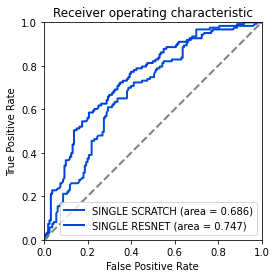

In [24]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr, tpr, _ = roc_curve(labels, single_preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color=plt.cm.winter(1-roc_auc),lw=2, label= "SINGLE SCRATCH" + ' (area = %0.3f)' % roc_auc)

fpr, tpr, _ = roc_curve(labels, single_resnet_preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color=plt.cm.winter(1-roc_auc),lw=2, label= "SINGLE RESNET" + ' (area = %0.3f)' % roc_auc)
    
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

The tROC curves also confirm the comparison

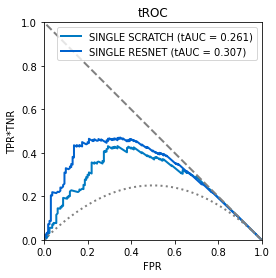

In [26]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(labels, single_preds)
tnr = 1 - fpr
tpr_per_tnr = tpr*tnr
roc_auc = auc(fpr, tpr_per_tnr)
plt.plot(fpr, tpr_per_tnr, color=plt.cm.winter(1-roc_auc*2),lw=2, label= "SINGLE SCRATCH" + ' (tAUC = %0.3f)' % roc_auc)


fpr, tpr, _ = roc_curve(labels, single_resnet_preds)
tnr = 1 - fpr
tpr_per_tnr = tpr*tnr
roc_auc = auc(fpr, tpr_per_tnr)
plt.plot(fpr, tpr_per_tnr, color=plt.cm.winter(1-roc_auc*2),lw=2, label= "SINGLE RESNET" + ' (tAUC = %0.3f)' % roc_auc)


# Optimal Classifier
plt.plot([1, 0], [0, 1], color='gray', lw=2, linestyle='--')
# Random Classifier
x = np.arange(0., 1., 0.01)
plt.plot(x, x*(1-x), color='gray', lw=2, linestyle=':')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('FPR')
plt.ylabel('TPR*TNR')
plt.title('tROC')
plt.legend(loc="upper right")

plt.show()

## Double Imput Comparison

A test set is created with the different permutations of the images of the testing spli, for the two alternative forced choice problem. The test set consists of 10 000 pairs of images

In [27]:
from tqdm.notebook import tqdm
import gc
import numpy as np

size = 1000

final_batch_left = []
final_batch_right = []
final_labels = []
first = True

for _ in tqdm(range(10)):
  # Is more efficient in this way
  # python have problems with small appends to big lists
  # so I create 10 lists and then merge at the end
  batch_left = []
  batch_right = []
  labels = []
  batch = []
  gc.collect()

  for _ in range(size):

    # Double input for siamese 

    # Double input for siamese 
    img = Image.open(jags_files_test[math.floor(random.uniform(0,len(jags_files_test)))])
    img_jag = np.array(img.resize((input_shape[0],input_shape[1]), Image.ANTIALIAS))

    img = Image.open(leops_files_test[math.floor(random.uniform(0,len(leops_files_test)))])
    img_leop = np.array(img.resize((input_shape[0],input_shape[1]), Image.ANTIALIAS))

    if np.random.rand() > 0.5:
      # if jaguar on left --> lab = 0
      batch_left.append(img_jag)   
      batch_right.append(img_leop)
      labels.append(0)
    else:
      # if jaguar on right --> lab = 1
      batch_left.append(img_leop)   
      batch_right.append(img_jag)  
      labels.append(1)

  if first:
    first = False
    final_batch_left = batch_left 
    final_batch_right = batch_right
    final_labels = labels
  else:
    final_batch_left.extend(batch_left)
    final_batch_right.extend(batch_right)
    final_labels.extend(labels)
    
testset = [[np.array(final_batch_left), np.array(final_batch_right)], final_labels]

Siamese models predictions

In [28]:
siamese_preds = siamese_model.predict(testset[0], batch_size = 100)
siamese_resnet_preds = siamese_resnet_model.predict(testset[0], batch_size = 100)

Below are the predictions given by the single input models to the problem of two alternative forced choices. To allow a comparison with the siamese models using ROC and tROC, the classification confidence for the single input models is calculated as the relative difference between the jaguar image score and the leopard image score 

In [29]:
from tqdm.notebook import tqdm

# Comparison between two scores

single_preds = []
single_resnet_preds = []

left_preds = single_model.predict(testset[0][0], batch_size = 100)
right_preds = single_model.predict(testset[0][1], batch_size = 100)

left_preds_res = single_resnet_model.predict(testset[0][0], batch_size = 100)
right_preds_res = single_resnet_model.predict(testset[0][1], batch_size = 100)

for left, right, left_res, right_res in zip(left_preds, right_preds, left_preds_res, right_preds_res):

  if left>right:
    # signal left
    single_preds.append(0.5 - (left-right)*0.5)
  else:
    # signal right
    single_preds.append(0.5 + (right - left)*0.5)

  if left_res>right_res:
    # signal left
    single_resnet_preds.append(0.5 - (left_res-right_res)*0.5)
  else:
    # signal right
    single_resnet_preds.append(0.5 + (right_res - left_res)*0.5)

Interesting results emerge from the comparison of the confusion matrices. First of all, it can be noted that the from scratch models, due to the overfitting, are not able to reach optimal accuracy. In particular, it is interesting to note how the problem is accentuated in the Siamese model which has more weights, although it also has a greater variety of input data during training. Pretrained models, on the other hand, have better results, as expected. It should be noted that in this case the Siamese net has the best performances, excellent in general, with an accuracy of 90%. This is due to the fact that the network can directly compare the features extracted from the two images, which the single model cannot do. Furthermore, the Siamese network has a greater variety of inputs since the same data can be permuted in different ways to generate the pairs for the alternative choice.

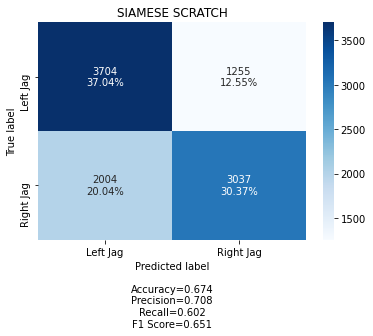

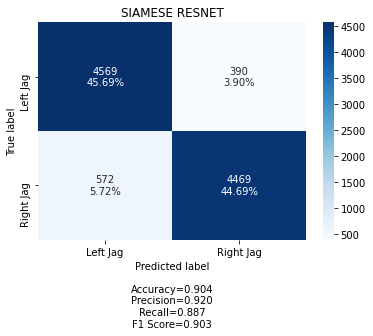

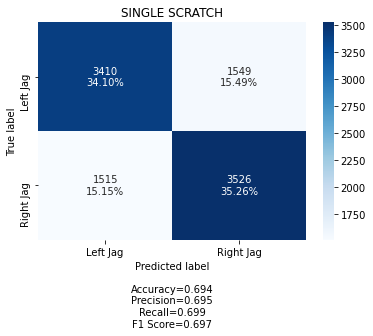

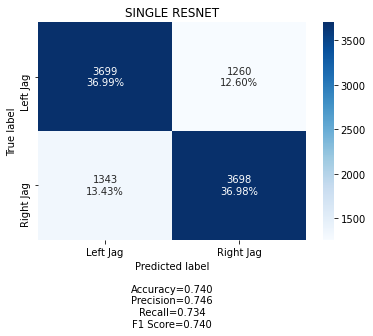

In [30]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(testset[1], [i>0.5 for i in siamese_preds])
make_confusion_matrix(cf_matrix, categories=["Left Jag", "Right Jag"], title="SIAMESE SCRATCH")

cf_matrix = confusion_matrix(testset[1], [i>0.5 for i in siamese_resnet_preds])
make_confusion_matrix(cf_matrix, categories=["Left Jag", "Right Jag"], title="SIAMESE RESNET")

cf_matrix = confusion_matrix(testset[1], [i>0.5 for i in single_preds])
make_confusion_matrix(cf_matrix, categories=["Left Jag", "Right Jag"], title="SINGLE SCRATCH")

cf_matrix = confusion_matrix(testset[1], [i>0.5 for i in single_resnet_preds])
make_confusion_matrix(cf_matrix, categories=["Left Jag", "Right Jag"], title="SINGLE RESNET")

Comparison between the ROC curves of the four models.

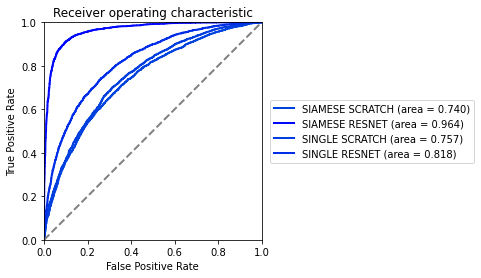

In [31]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr, tpr, _ = roc_curve(testset[1], siamese_preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color=plt.cm.winter(1-roc_auc),lw=2, label= "SIAMESE SCRATCH" + ' (area = %0.3f)' % roc_auc)

fpr, tpr, _ = roc_curve(testset[1], siamese_resnet_preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color=plt.cm.winter(1-roc_auc),lw=2, label= "SIAMESE RESNET" + ' (area = %0.3f)' % roc_auc)

fpr, tpr, _ = roc_curve(testset[1], single_preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color=plt.cm.winter(1-roc_auc),lw=2, label= "SINGLE SCRATCH" + ' (area = %0.3f)' % roc_auc)

fpr, tpr, _ = roc_curve(testset[1], single_resnet_preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color=plt.cm.winter(1-roc_auc),lw=2, label= "SINGLE RESNET" + ' (area = %0.3f)' % roc_auc)
    
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)

plt.show()

Comparison between the tROC curves of the four models.

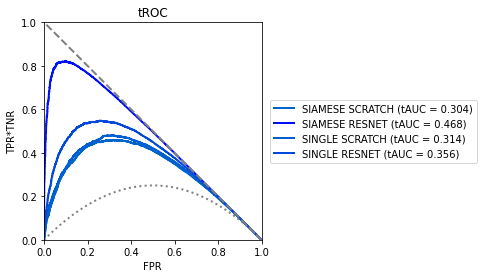

In [32]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(testset[1], siamese_preds)
tnr = 1 - fpr
tpr_per_tnr = tpr*tnr
roc_auc = auc(fpr, tpr_per_tnr)
plt.plot(fpr, tpr_per_tnr, color=plt.cm.winter(1-roc_auc*2),lw=2, label= "SIAMESE SCRATCH" + ' (tAUC = %0.3f)' % roc_auc)

fpr, tpr, _ = roc_curve(testset[1], siamese_resnet_preds)
tnr = 1 - fpr
tpr_per_tnr = tpr*tnr
roc_auc = auc(fpr, tpr_per_tnr)
plt.plot(fpr, tpr_per_tnr, color=plt.cm.winter(1-roc_auc*2),lw=2, label= "SIAMESE RESNET" + ' (tAUC = %0.3f)' % roc_auc)


fpr, tpr, _ = roc_curve(testset[1], single_preds)
tnr = 1 - fpr
tpr_per_tnr = tpr*tnr
roc_auc = auc(fpr, tpr_per_tnr)
plt.plot(fpr, tpr_per_tnr, color=plt.cm.winter(1-roc_auc*2),lw=2, label= "SINGLE SCRATCH" + ' (tAUC = %0.3f)' % roc_auc)

fpr, tpr, _ = roc_curve(testset[1], single_resnet_preds)
tnr = 1 - fpr
tpr_per_tnr = tpr*tnr
roc_auc = auc(fpr, tpr_per_tnr)
plt.plot(fpr, tpr_per_tnr, color=plt.cm.winter(1-roc_auc*2),lw=2, label= "SINGLE RESNET" + ' (tAUC = %0.3f)' % roc_auc)

# Optimal Classifier
plt.plot([1, 0], [0, 1], color='gray', lw=2, linestyle='--')
# Random Classifier
x = np.arange(0., 1., 0.01)
plt.plot(x, x*(1-x), color='gray', lw=2, linestyle=':')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('FPR')
plt.ylabel('TPR*TNR')
plt.title('tROC')
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)

plt.show()